In [11]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [12]:
server = 'LAPTOP-76EGVTT7\SQLEXPRESS'
db = 'project'

In [13]:
conn = pyodbc.connect ('DRIVER= {SQL Server}; SERVER='+server+';DATABASE='+db+ ';UID=Akshay112;PWD=Akshay112; Trusted connection=YES')


In [19]:
sql = " select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.account_id"

In [20]:
df = pd.read_sql (sql,conn)
display (df)

C:\Users\akshay\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,card_id,disp_id,type,issued,account_id,disposition_client_id,disposition_type,client_id,birth_number,district_id,...,balance,k_symbol,bank,account,loan_id,loan_date,loan_amount,duration,payments,status
0,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,300.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
1,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,9900.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
2,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42599.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
3,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42658.199219,UROK,None,NaN,5126,1994-07-24,208128,48,4336.0,B
4,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,48117.199219,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,94294.000000,None,YZ,45816707.0,7240,1993-09-06,274740,60,4579.0,A
864,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,59294.000000,None,None,NaN,7240,1993-09-06,274740,60,4579.0,A
865,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,59527.101562,UROK,None,NaN,7240,1993-09-06,274740,60,4579.0,A
866,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,92893.101562,None,None,NaN,7240,1993-09-06,274740,60,4579.0,A


In [21]:
display (df.shape)

(868, 50)

In [22]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id', 'date',
       'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account',
       'loan_id', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status'],
      dtype='object')

In [23]:
print (df.isnull().sum())

card_id                    0
disp_id                    0
type                       0
issued                     0
account_id                 0
disposition_client_id      0
disposition_type           0
client_id                  0
birth_number               0
district_id                0
A1                         0
A2                         0
A3                         0
A4                         0
A5                         0
A6                         0
A7                         0
A8                         0
A9                         0
A10                        0
A11                        0
A12                        0
A13                        0
A14                        0
A15                        0
A16                        0
order_id                   0
bank_to                    0
account_to                 0
amount                     0
k_symbol                   0
account_date               0
account_district_id        0
frequency                  0
trans_id      

In [24]:
x = df[['loan_amount', 'balance']].values
display (x)

array([[208128.       ,    300.       ],
       [208128.       ,   9900.       ],
       [208128.       ,  42599.       ],
       ...,
       [274740.       ,  59527.1015625],
       [274740.       ,  92893.1015625],
       [274740.       , 122893.1015625]])

In [27]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
minmax_x = minmax.fit_transform(x)
print (minmax_x)

[[6.10541062e-01 6.97322337e-04]
 [6.10541062e-01 6.76402667e-02]
 [6.10541062e-01 2.95657698e-01]
 ...
 [8.20718640e-01 4.13701131e-01]
 [8.20718640e-01 6.46369702e-01]
 [8.20718640e-01 8.55566403e-01]]


In [28]:
wcss = []
for i in range(2,15):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(minmax_x)
    wcss.append (kmeans.inertia_)
display (wcss)

[46.114885682985026,
 31.123680126227793,
 23.282403157594025,
 18.29057115018261,
 13.833647582504547,
 11.873963026723997,
 10.290169542930823,
 8.920313329740194,
 7.654107808433647,
 6.619559654656443,
 5.8329770724634225,
 5.309928452606217,
 4.83294133985728]

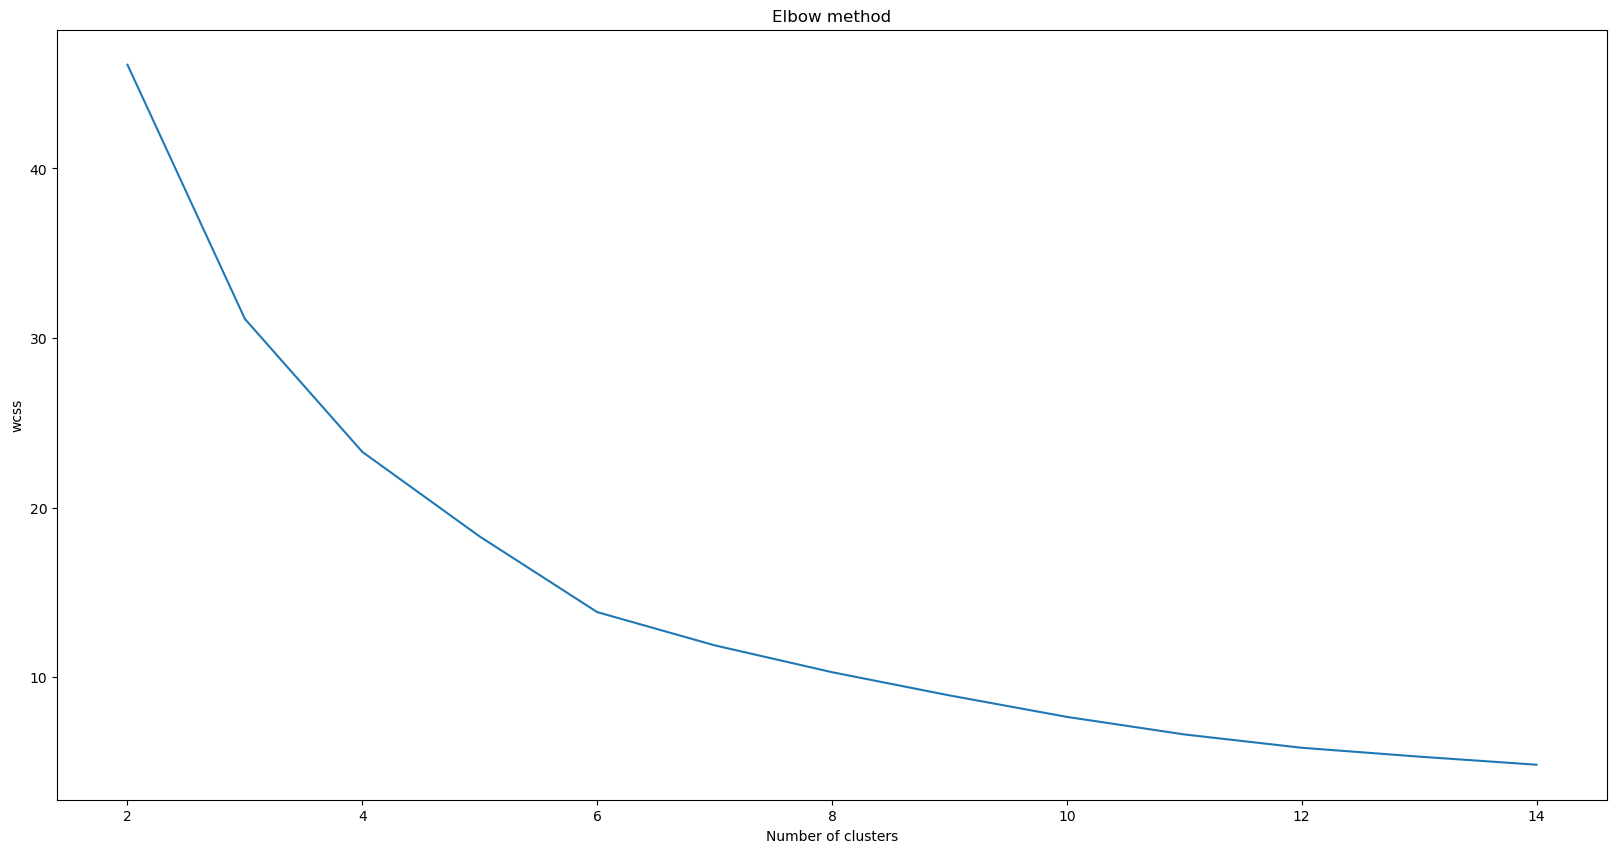

In [29]:
plt.plot (range(2,15), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
kmeans =  KMeans (n_clusters =  6 , init = 'k-means++')
kmeans = kmeans.fit(minmax_x)
y_kmeans =kmeans.labels_
display (y_kmeans)

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 3, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 3,
       3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 3, 2, 3,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 2, 2, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

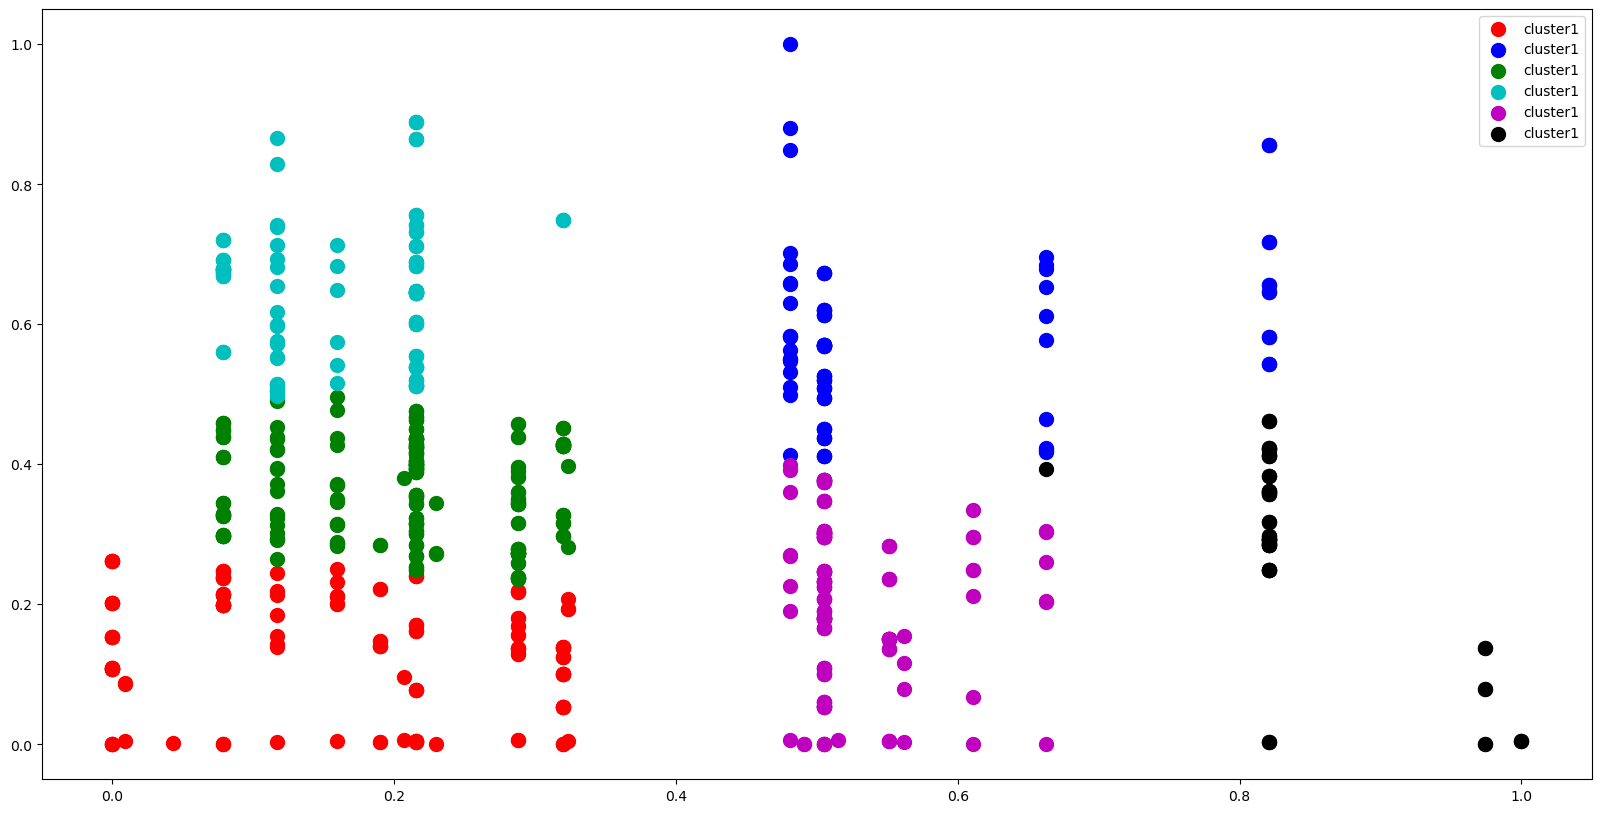

In [35]:
plt.scatter (minmax_x[y_kmeans == 0,0], minmax_x[y_kmeans == 0,1], s = 100, c='r', label = 'cluster1')
plt.scatter (minmax_x[y_kmeans == 1,0], minmax_x[y_kmeans == 1,1], s = 100, c='b', label = 'cluster1')
plt.scatter (minmax_x[y_kmeans == 2,0], minmax_x[y_kmeans == 2,1], s = 100, c='g', label = 'cluster1')
plt.scatter (minmax_x[y_kmeans == 3,0], minmax_x[y_kmeans == 3,1], s = 100, c='c', label = 'cluster1')
plt.scatter (minmax_x[y_kmeans == 4,0], minmax_x[y_kmeans == 4,1], s = 100, c='m', label = 'cluster1')
plt.scatter (minmax_x[y_kmeans == 5,0], minmax_x[y_kmeans == 5,1], s = 100, c='k', label = 'cluster1')
plt.legend()
plt.show()

In [40]:
x_final = pd.concat([df.iloc[:,4],pd.DataFrame(x), pd.DataFrame(y_kmeans)], axis=1 )
x_final.columns = ['account_id', 'loan_amount', 'balance', 'cluster']
x_final.to_excel('D:\\data science top mentor\\20 may lect 30\\Batch 75 Day30\\Batch 75 Day30\\Project Top Mentor Explained\\ K_Means.xlsx', index=None)
display (x_final)

,account_id,loan_amount,balance,cluster
0,790,208128.0,300.000000,4
1,790,208128.0,9900.000000,4
2,790,208128.0,42599.000000,4
3,790,208128.0,42658.199219,4
4,790,208128.0,48117.199219,4
...,...,...,...,...
863,11013,274740.0,94294.000000,1
864,11013,274740.0,59294.000000,5
865,11013,274740.0,59527.101562,5
866,11013,274740.0,92893.101562,1


In [41]:
display (x_final.cluster.value_counts())

2    255
4    158
0    156
3    129
1    100
5     70
Name: cluster, dtype: int64

In [42]:
x_hc = df[['loan_amount', 'balance']].values
display(x_hc)

array([[208128.       ,    300.       ],
       [208128.       ,   9900.       ],
       [208128.       ,  42599.       ],
       ...,
       [274740.       ,  59527.1015625],
       [274740.       ,  92893.1015625],
       [274740.       , 122893.1015625]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_x = minmax.fit_transform(x_hc)
print (minmax_x)

[[6.10541062e-01 6.97322337e-04]
 [6.10541062e-01 6.76402667e-02]
 [6.10541062e-01 2.95657698e-01]
 ...
 [8.20718640e-01 4.13701131e-01]
 [8.20718640e-01 6.46369702e-01]
 [8.20718640e-01 8.55566403e-01]]


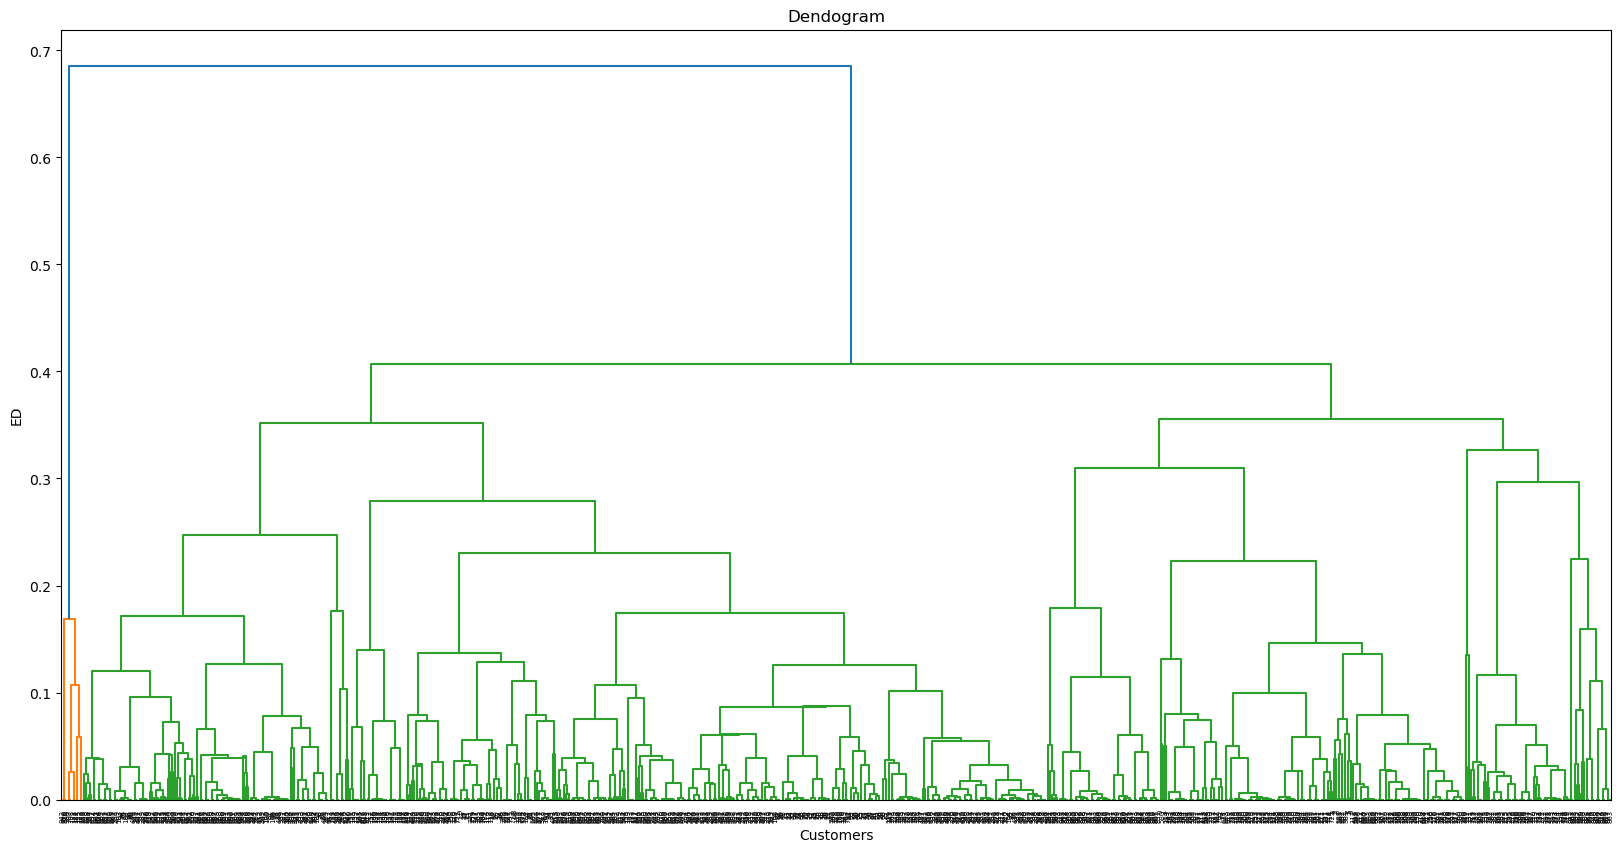

In [45]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(minmax_x, method='centroid'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()

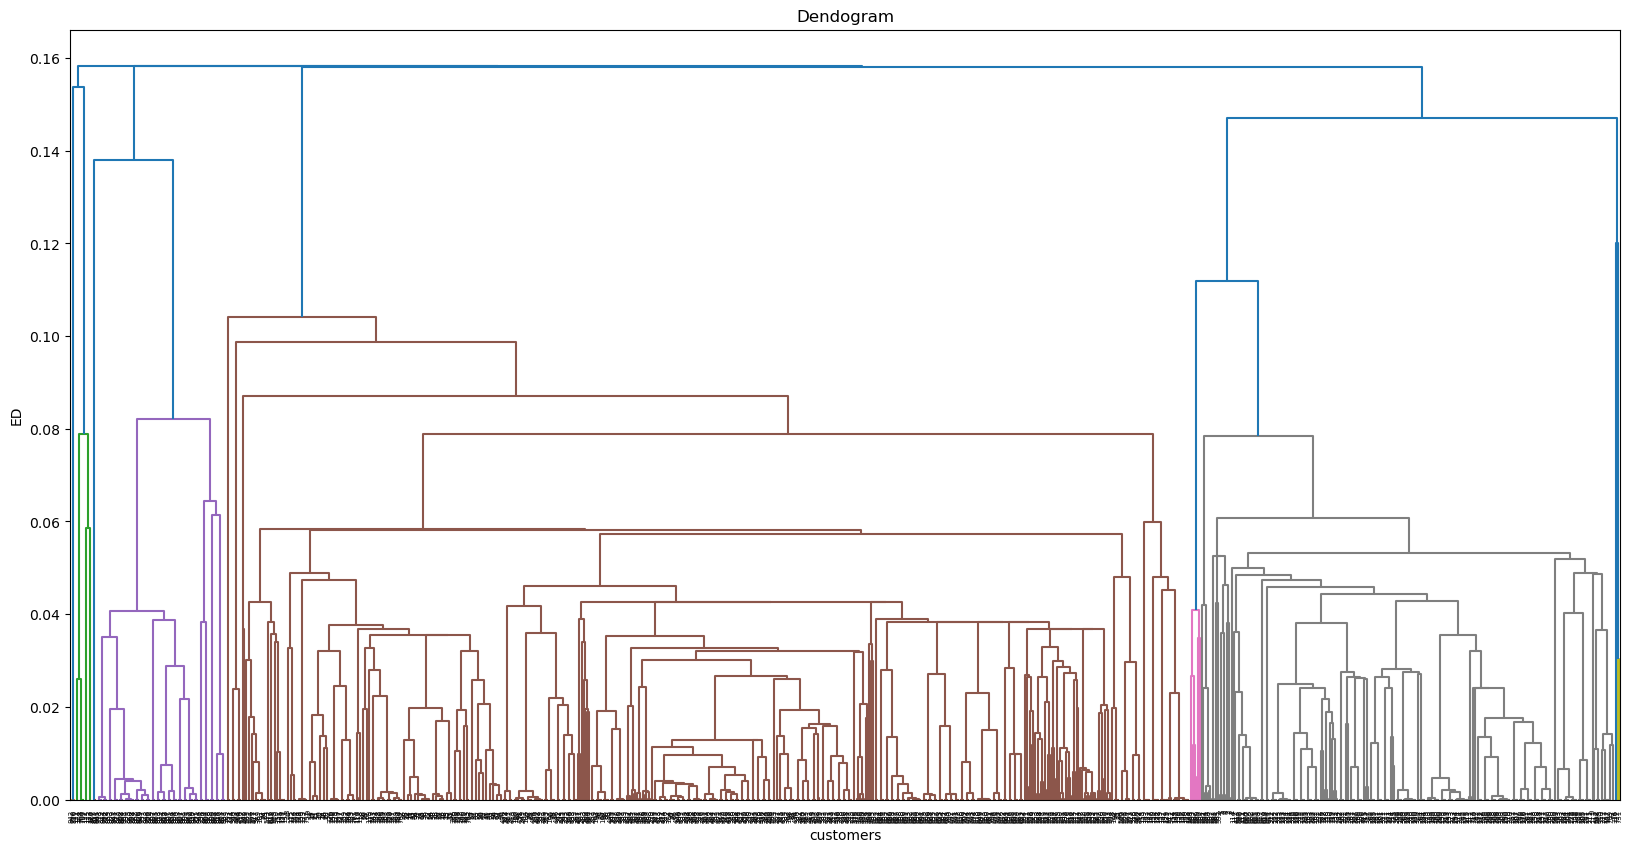

In [47]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(minmax_x, method='single'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('ED')
plt.show()

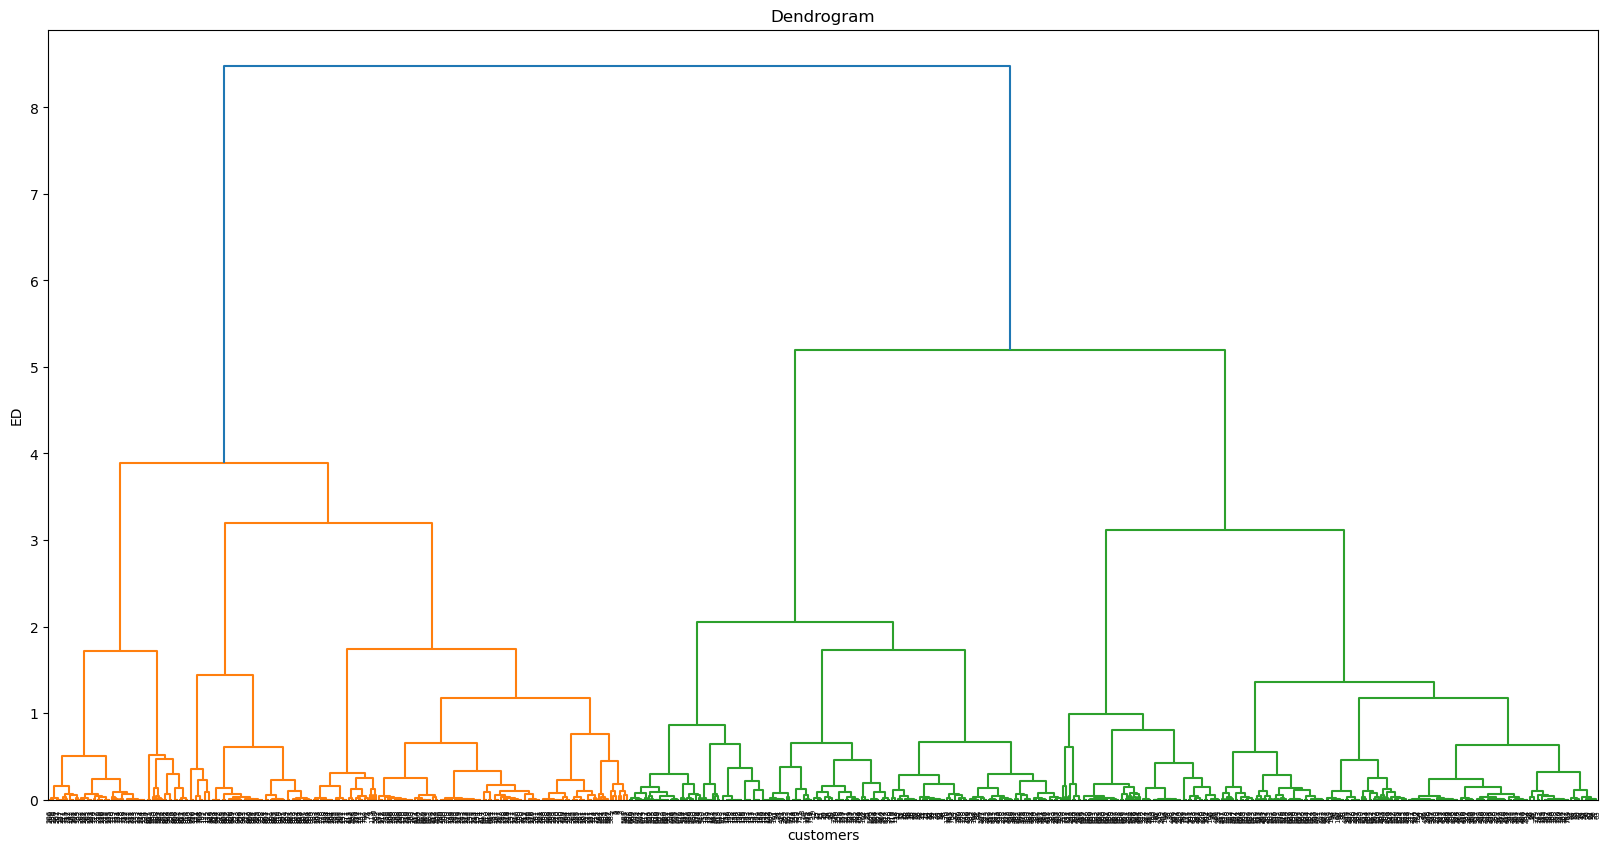

In [48]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('ED')
plt.show()

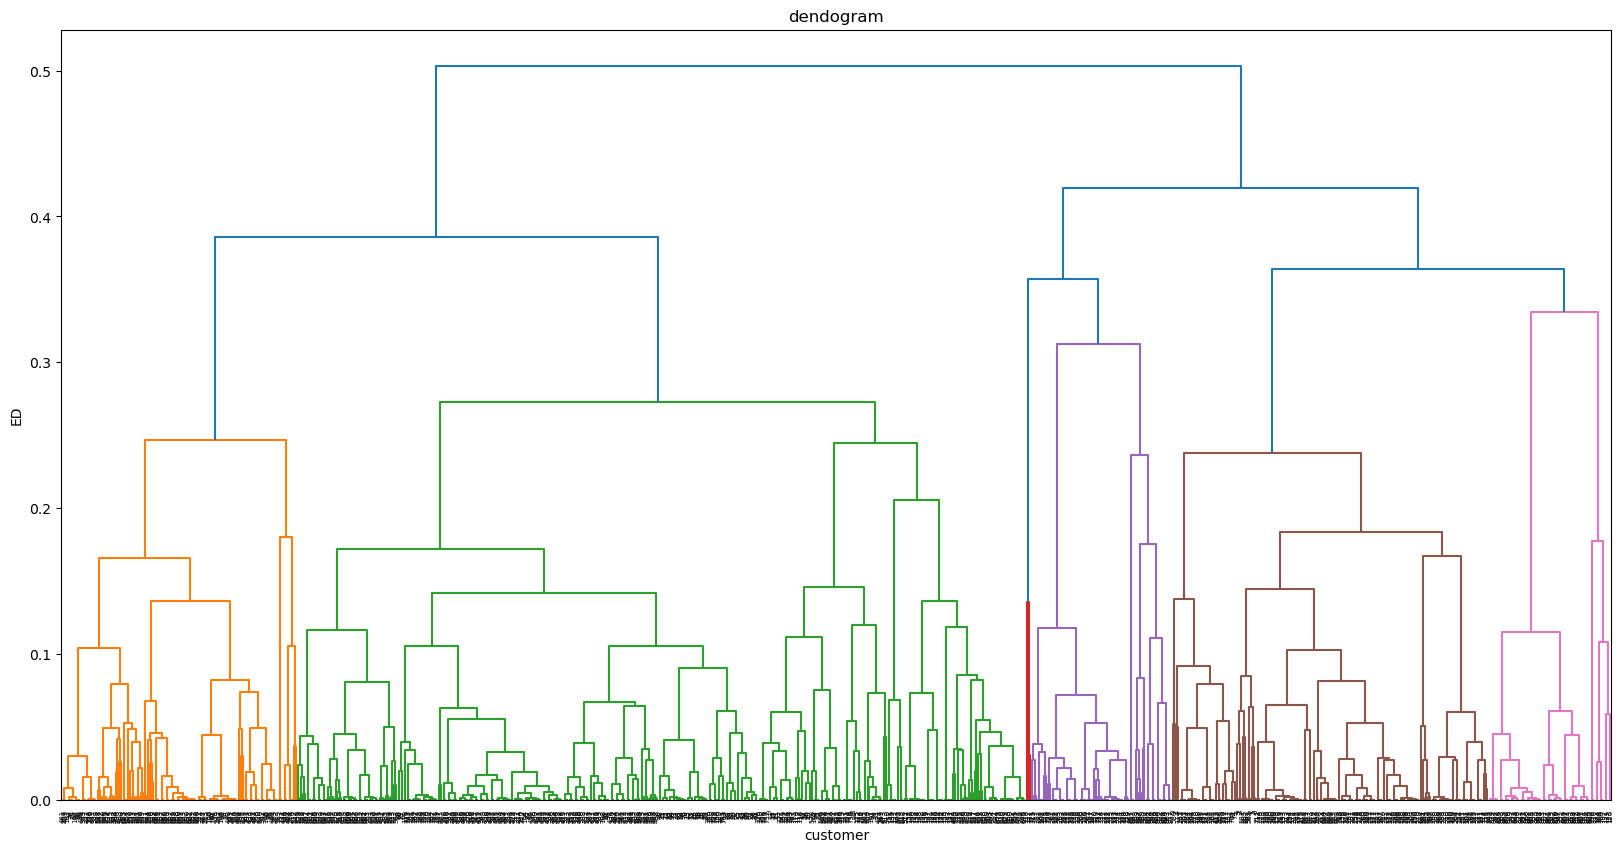

In [49]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='average'))
plt.title('dendogram')
plt.xlabel('customer')
plt.ylabel('ED')
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(minmax_x)
display(y_hc)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
pd.DataFrame(y_hc).value_counts()

0    543
1    325
dtype: int64

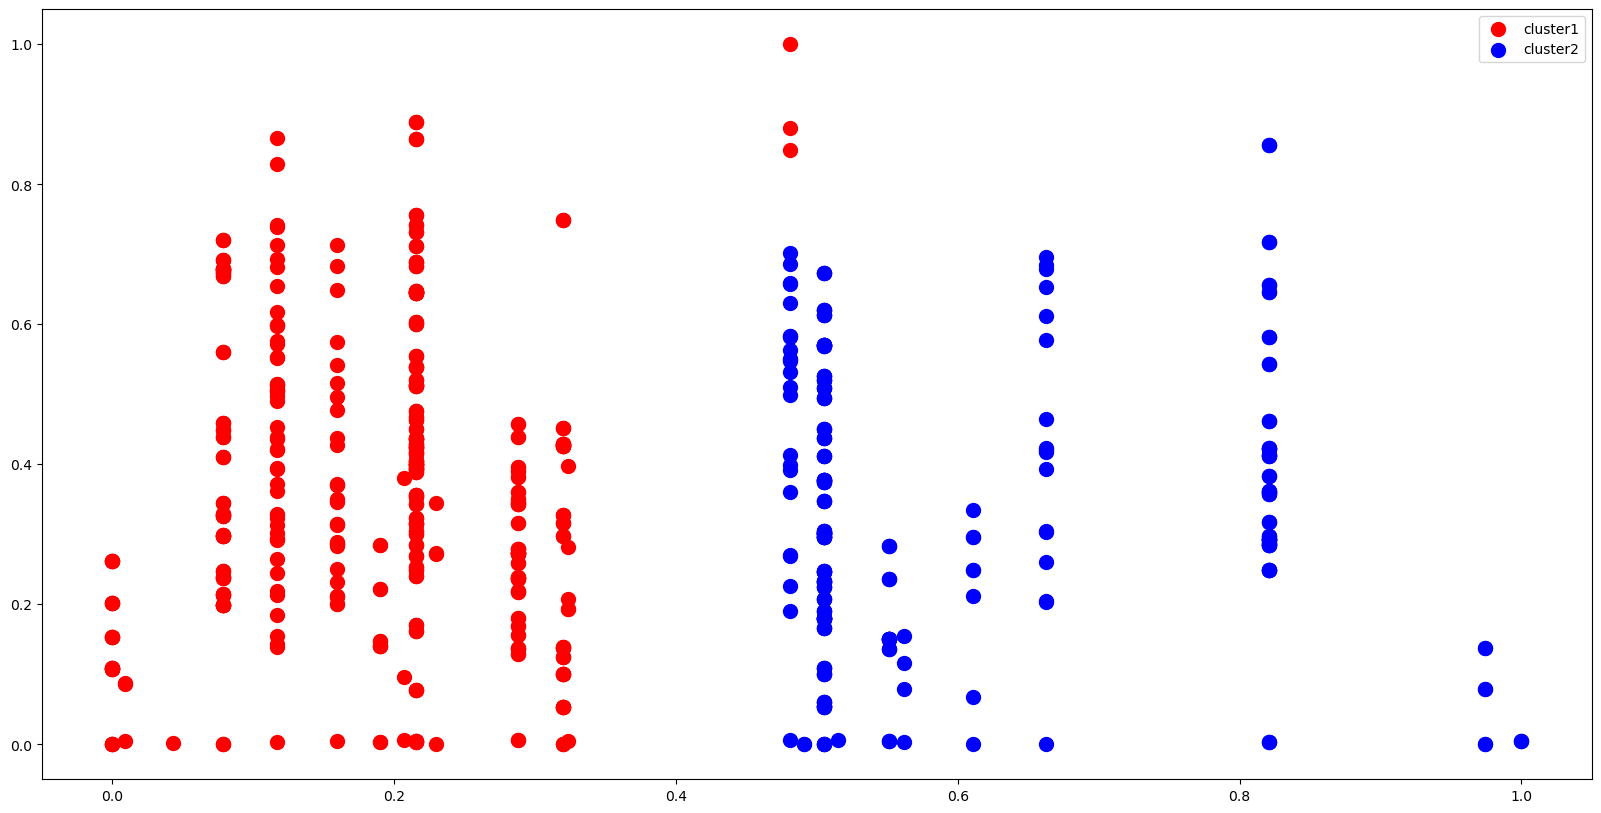

In [52]:
plt.scatter(minmax_x [y_hc == 0,0], minmax_x [y_hc==0,1], s=100, c='r', label = 'cluster1')
plt.scatter(minmax_x [y_hc == 1,0], minmax_x [y_hc==1,1], s = 100, c='b', label = 'cluster2')
plt.legend()
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(minmax_x)
display(y_hc)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
pd.DataFrame(y_hc).value_counts()

1    540
0    328
dtype: int64

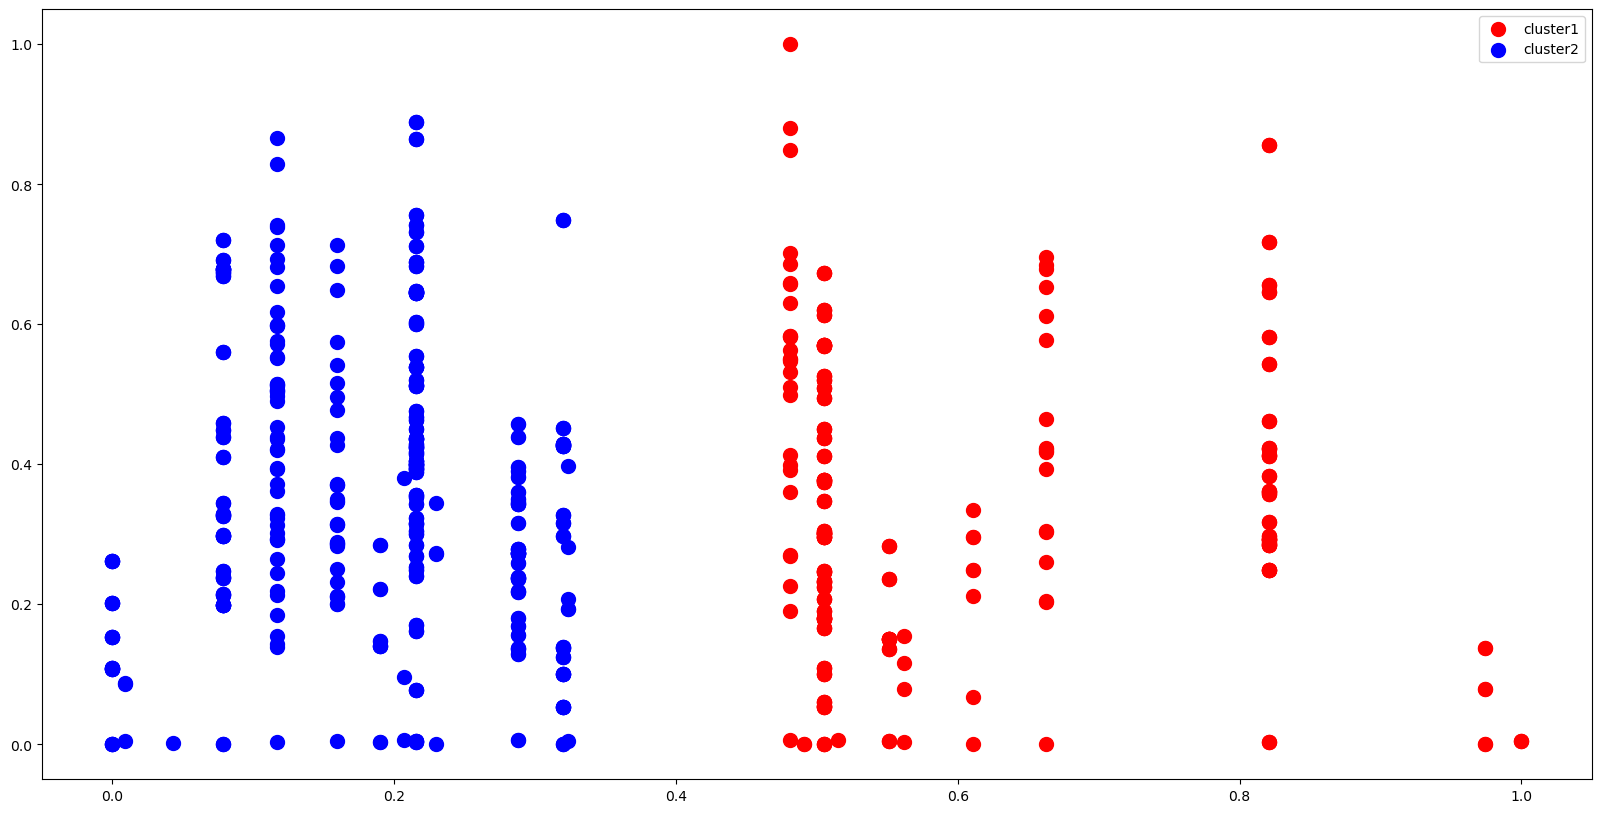

In [56]:
plt.scatter(minmax_x[y_hc==0,0], minmax_x[y_hc==0,1], c='r', s=100, label = 'cluster1')
plt.scatter(minmax_x[y_hc==1,0], minmax_x[y_hc==1,1], c='b', s=100, label = 'cluster2')
plt.legend()
plt.show()

In [58]:
xhc_final = pd.concat([df.iloc[:,4], pd.DataFrame(x_hc), pd.DataFrame(y_hc)], axis=1)
xhc_final.columns = ['account_id', 'loan_amount', 'balance', 'cluster']
xhc_final.to_excel('D:\\data science top mentor\\20 may lect 30\\Batch 75 Day30\\Batch 75 Day30\\Project Top Mentor Explained\\hc.xlsx', index= None)
display (xhc_final)                   

,account_id,loan_amount,balance,cluster
0,790,208128.0,300.000000,0
1,790,208128.0,9900.000000,0
2,790,208128.0,42599.000000,0
3,790,208128.0,42658.199219,0
4,790,208128.0,48117.199219,0
...,...,...,...,...
863,11013,274740.0,94294.000000,0
864,11013,274740.0,59294.000000,0
865,11013,274740.0,59527.101562,0
866,11013,274740.0,92893.101562,0
